In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#colab bağlantısı yapıldı

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
print('Libraries Imported')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install Livelossplot
from livelossplot import PlotLossesKeras


Libraries Imported


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/all-mias/'

In [ ]:
print("reading dataframe")
info=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [ ]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info = info.drop('level_0', axis =1)
info = info.drop('index', axis =1)
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb005,F,CIRC,B,477.0,133.0,30.0
3,mdb010,F,CIRC,B,525.0,425.0,33.0
4,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,M,127.0,505.0,123.0
118,mdb290,D,CIRC,B,337.0,353.0,45.0
119,mdb312,F,MISC,B,240.0,263.0,20.0
120,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
# B = 0
# M = 1
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,0,535.0,425.0,197.0
1,mdb002,G,CIRC,0,522.0,280.0,69.0
2,mdb005,F,CIRC,0,477.0,133.0,30.0
3,mdb010,F,CIRC,0,525.0,425.0,33.0
4,mdb012,F,CIRC,0,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,1,127.0,505.0,123.0
118,mdb290,D,CIRC,0,337.0,353.0,45.0
119,mdb312,F,MISC,0,240.0,263.0,20.0
120,mdb314,F,MISC,0,518.0,191.0,39.0


In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook

import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

print("All modules have been imported")

All modules have been imported


In [ ]:
info=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)
info.SEVERITY.fillna(0)

0      B
1      B
2      0
3      0
4      B
      ..
325    0
326    0
327    0
328    0
329    0
Name: SEVERITY, Length: 330, dtype: object

<Axes: ylabel='CLASS'>

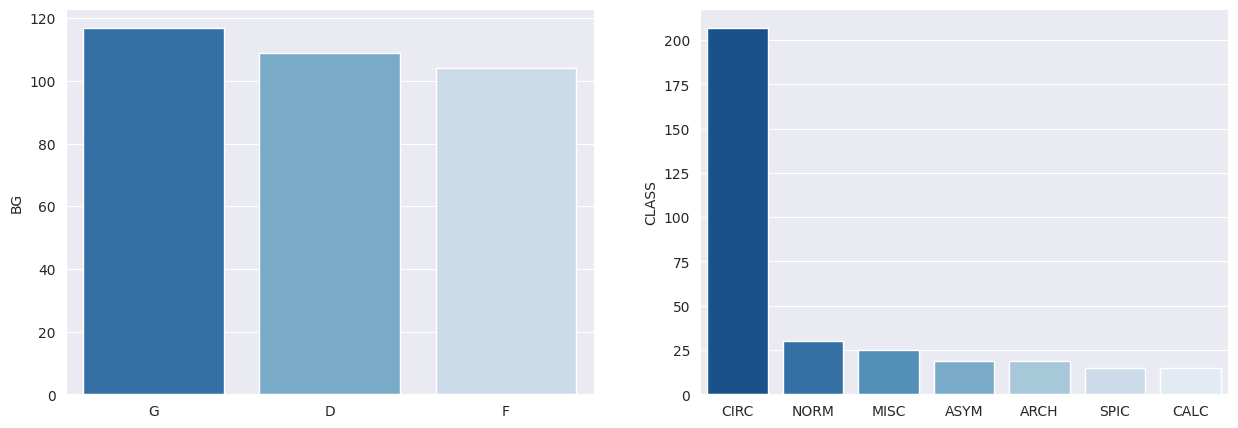

In [ ]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=info.BG.unique(),y=info.BG.value_counts(),palette='Blues_r',ax=ax1)
sns.barplot(x=info.CLASS.unique(),y=info.CLASS.value_counts(),palette='Blues_r',ax=ax2)

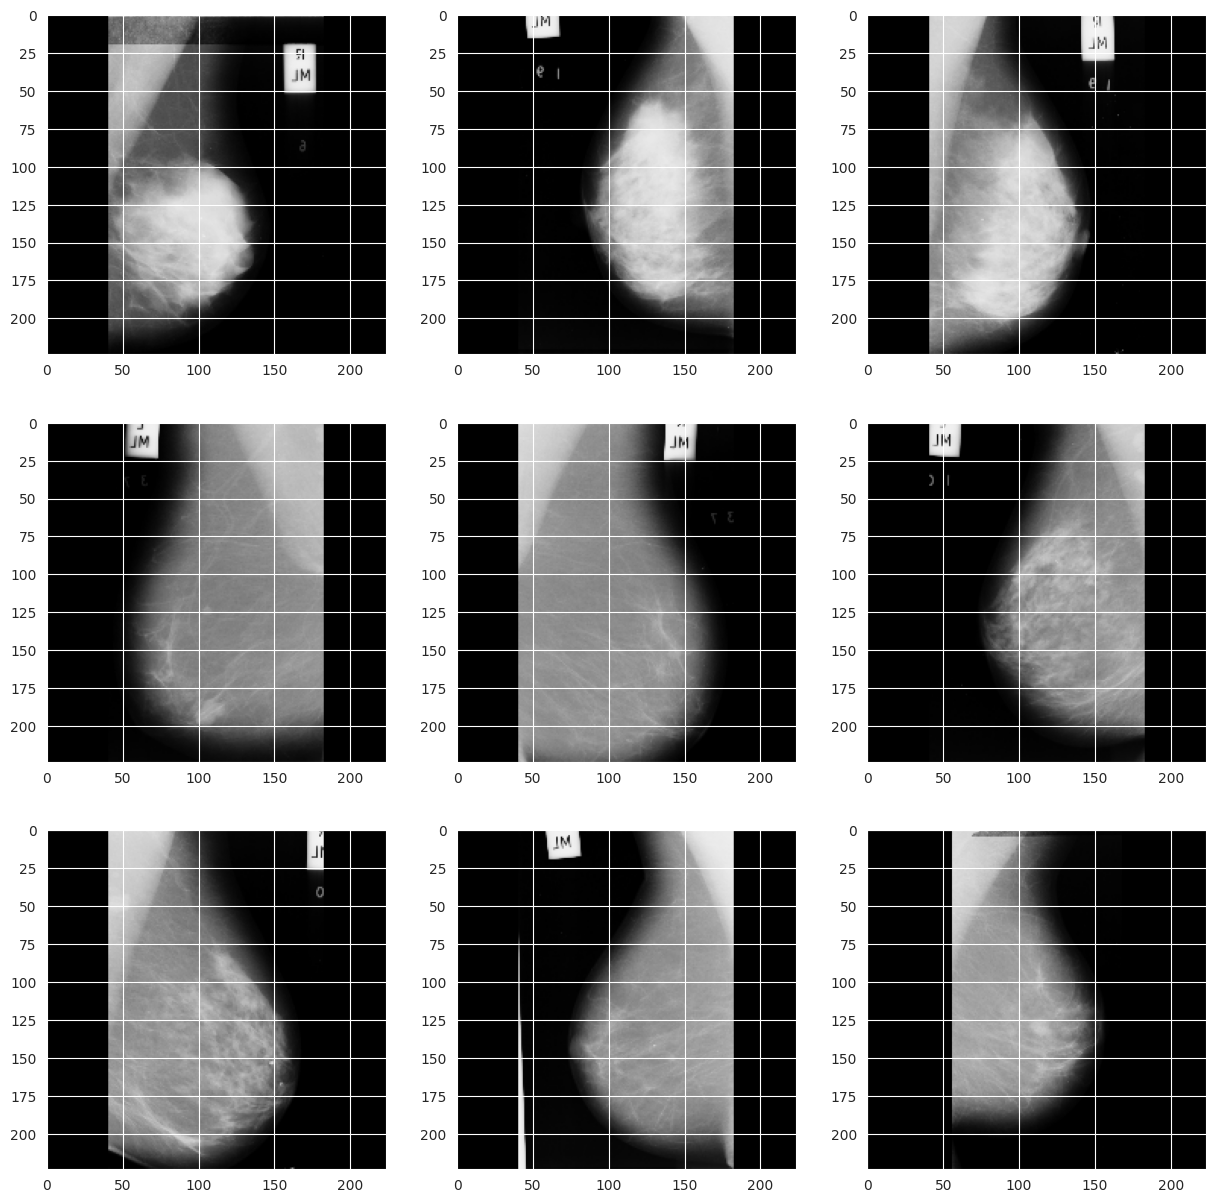

In [ ]:
from PIL import Image
import glob
x= []
for filename in sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/all-mias/*.pgm")):
    img=cv2.imread(filename)
    img =cv2.resize(img,(224, 224))
    x.append(img)
fig=plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i])
plt.show()

In [ ]:
# Image Augmentation
no_angles = 360
url = '/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/all-mias/'

def save_dictionary(path,data):
        print('saving catalog...')
        #open('u.item', encoding="utf-8")
        import json
        with open(path,'w') as outfile:
            json.dump(str(data), fp=outfile)
        # save to file:
        print(' catalog saved')

In [ ]:
# train_test_split_datagen=ImageDataGenerator("augmentations such as flip,brightness range,etc....")
# val_datagen=ImageDataGenerator("augmentations such as flip,brightness range,etc....")
# test_datagen=ImageDataGenerator("augmentations such as flip,brightness range,etc....")
def read_image():
        print("Reading images")
        import cv2
        info = {}
        for i in range(322):
            if i<9:
                image_name='mdb00'+str(i+1)
            elif i<99:
                image_name='mdb0'+str(i+1)
            else:
                image_name = 'mdb' + str(i+1)
            image_address= url+image_name+'.pgm'
            img = cv2.imread(image_address,1)
            img = cv2.resize(img, (224,224))
            rows, cols,channel = img.shape
            info[image_name]={}
            for angle in range(0,no_angles,8):
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
                img_rotated = cv2.warpAffine(img, M, (cols, rows))
                info[image_name][angle]=img_rotated
        return (info)

In [ ]:
def read_lable():
    print("Reading labels")
    filename = url+'Info.txt'
    text_all = open(filename).read()
    #print(text_all)
    lines=text_all.split('\n')
    info={}
    for line in lines:
        words=line.split(' ')
        if len(words)>3:
            if (words[3] == 'B'):
                info[words[0]] = {}
                for angle in range(0,no_angles,8):
                    info[words[0]][angle] = 0
            if (words[3] == 'M'):
                info[words[0]] = {}
                for  angle in range(0,no_angles,8):
                    info[words[0]][angle] = 1
    return (info)

In [ ]:
import numpy as np
lable_info=read_lable()
image_info=read_image()
ids=lable_info.keys()
del lable_info['Truth-Data:']
X=[]
Y=[]
for id in ids:
    for angle in range(0,no_angles,8):
        X.append(image_info[id][angle])
        Y.append(lable_info[id][angle])
X=np.array(X)
Y=np.array(Y)
Y=to_categorical(Y,2)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.3, random_state=42)
print(len(x_train),len(x_val),len(x_test))

Reading labels
Reading images
3622 1087 466


In [ ]:
#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
nClasses=2

Model

In [ ]:
base_Neural_Net= EfficientNetB7(input_shape=(224,224,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

for layer in base_Neural_Net.layers:
    layer.trainable = False

258076736/258076736 [==============================] - 14s 0us/step


In [ ]:
c1=PlotLossesKeras()
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','AUC'])

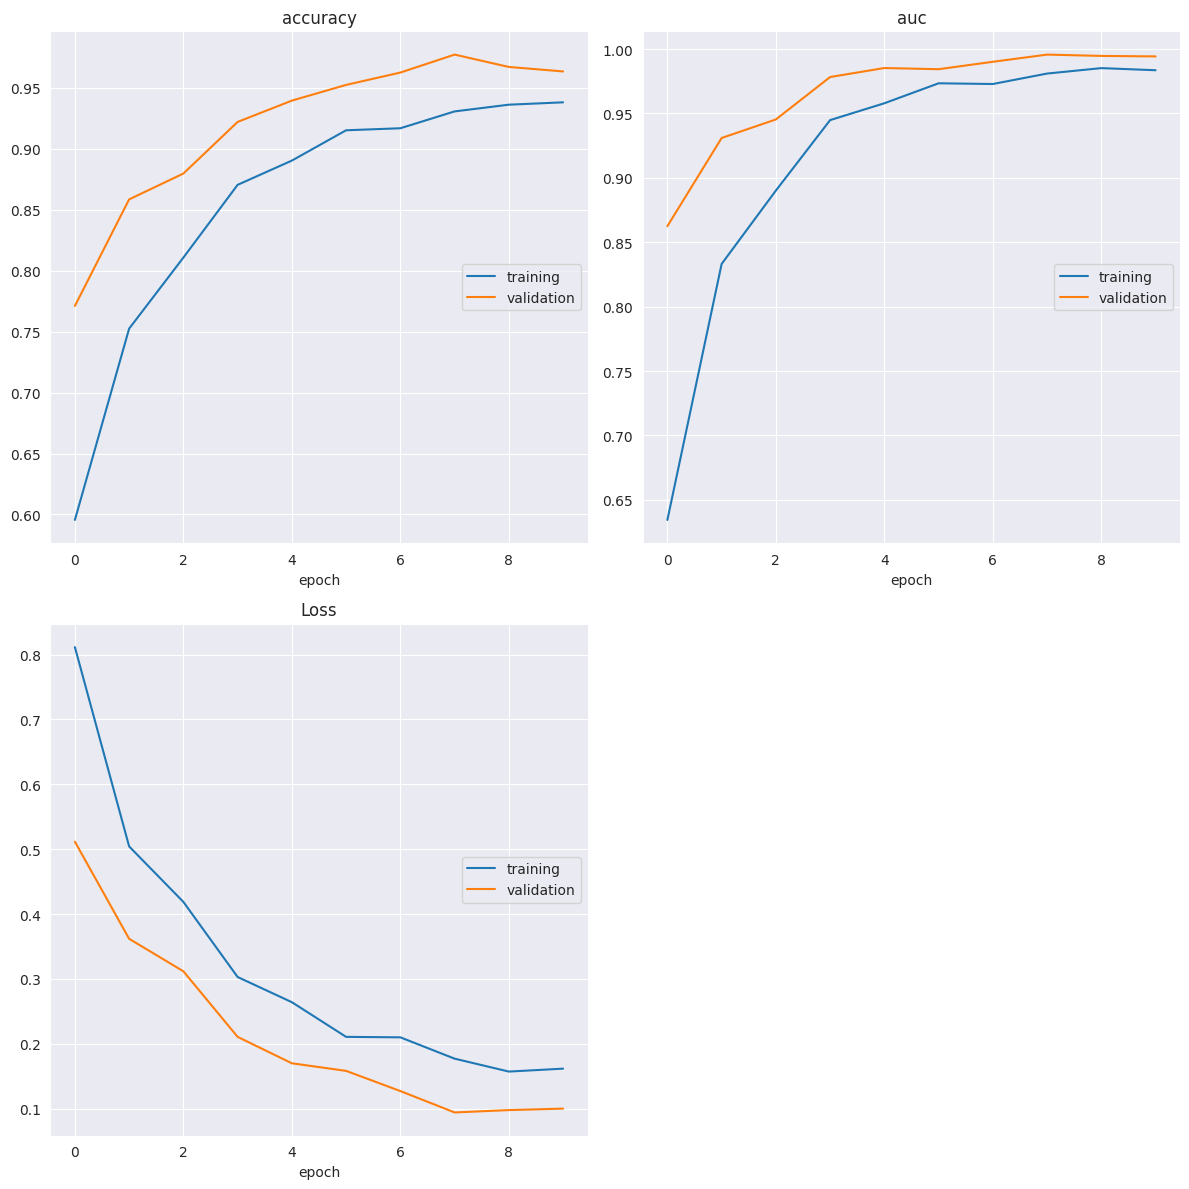

accuracy
	training         	 (min:    0.596, max:    0.938, cur:    0.938)
	validation       	 (min:    0.771, max:    0.977, cur:    0.963)
auc
	training         	 (min:    0.634, max:    0.985, cur:    0.984)
	validation       	 (min:    0.862, max:    0.996, cur:    0.994)
Loss
	training         	 (min:    0.157, max:    0.812, cur:    0.162)
	validation       	 (min:    0.094, max:    0.512, cur:    0.100)
30/30 [==============================] - 6s 214ms/step - loss: 0.0962 - accuracy: 0.9721 - auc: 0.9945


In [ ]:
# Model eğitimi ve değerlendirme
history = model.fit(x_train, y_train, epochs=10, callbacks=[c1, c3], batch_size=16, validation_data=(x_val, y_val))

evaluation_result = model.evaluate(x_test, y_test, batch_size=16)

# En yüksek test ve eğitim doğruluk değerleri
max_train_accuracy = max(history.history['accuracy'])
max_val_accuracy = max(history.history['val_accuracy'])
test_accuracy = evaluation_result[1]  # Test doğruluğu evaluate fonksiyonunun ikinci değeri olarak döner
min_loss = min(history.history['loss'])
test_loss = evaluation_result[0]  # Test kaybı evaluate fonksiyonunun ilk değeri olarak döner